In [6]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [ ]:
def make_linear_stepped_routines(J_V_ratios, mu_V_ratios, time_array, dt):
    if len(J_V_ratios) != len(mu_V_ratios) or len(J_V_ratios) != len(time_array):
        raise ValueError("The length of J_V_ratios, mu_V_ratios, and time_array must be equal.")
    
    num_steps = len(time_array)
    
    times = []
    J_V_ratio_steps = []
    mu_V_ratio_steps = []
    start_time = 0
    
    for i in range(num_steps):
        t = time_array[i]
        time_array_i = np.linspace(start_time, start_time + t, num=int(t / dt))
        times.append(time_array_i)
        
        J_V_ratio_steps.append(np.linspace(J_V_ratios[i][0], J_V_ratios[i][1], len(time_array_i)))
        mu_V_ratio_steps.append(np.linspace(mu_V_ratios[i][0], mu_V_ratios[i][1], len(time_array_i)))
        
        start_time += t
    
    concatenated_times = np.concatenate(times)
    J_V_ratio_routine = np.concatenate(J_V_ratio_steps)
    mu_V_ratio_routine = np.concatenate(mu_V_ratio_steps)
    
    return concatenated_times, J_V_ratio_routine, mu_V_ratio_routine

df = pd.read_csv("energy_gap_over_V_neg_V_resolution=1000_25x25.csv", index_col='J/V_ratios')
energy_gap_grid = df.to_numpy()

J_V_ratios = np.linspace(-25,25,1000)
mu_V_ratios = np.linspace(0,25,1000)
mu_V_ratio_grid, J_V_ratio_grid = np.meshgrid(mu_V_ratios, J_V_ratios)


In [8]:
N = 2
M = 5
V = -1
dt = 0.01

time_array = [5/3, 5/3, 5/3]

J_V_ratios = [
    [0.1, 10],  # step 1
    [10, 10],   # step 2
    [10, 0.5],  # step 3
]

mu_V_ratios = [
    [10, 10],  # step 1
    [10, 0],   # step 2
    [0, 0],    # step 3
]

times, J_V_ratio_routine, mu_V_ratio_routine = make_linear_stepped_routines(J_V_ratios, mu_V_ratios, time_array, dt)
results = simulate_adiabatic_evolution(N, M, V, mu_V_ratio_routine, J_V_ratio_routine, times, dt=dt, initial_state=None)

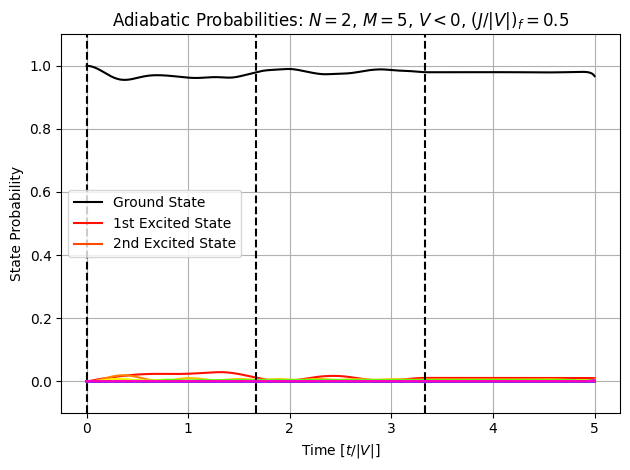

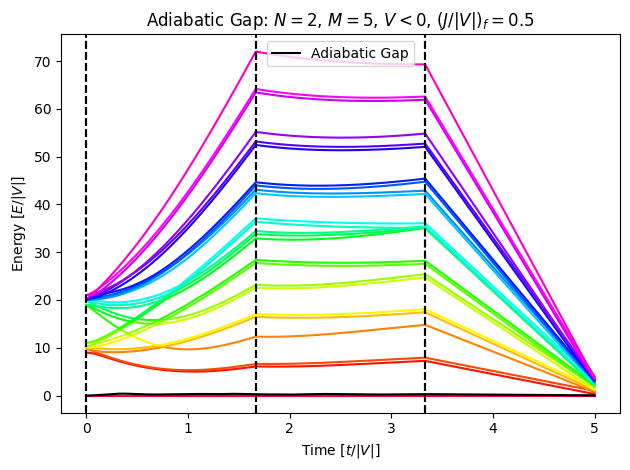

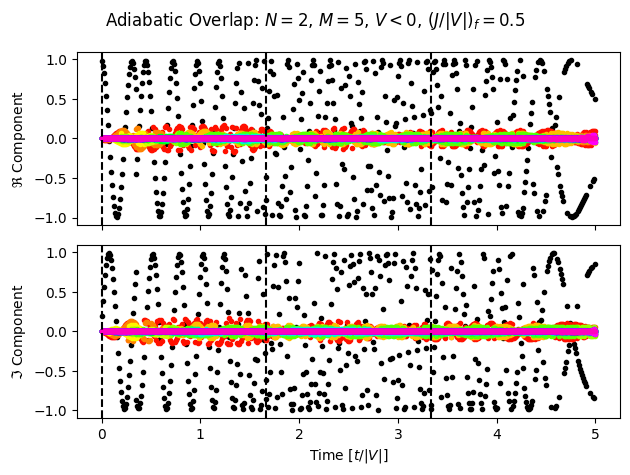

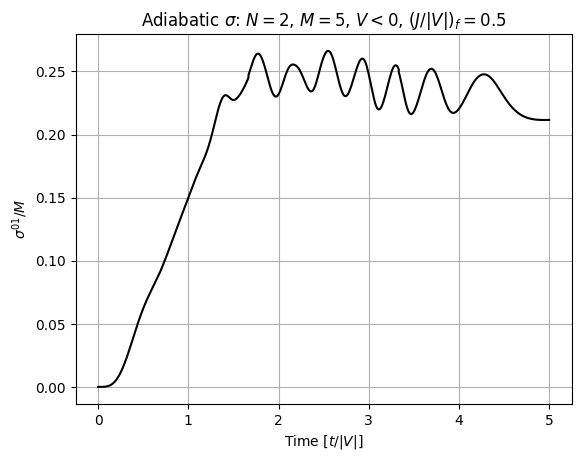

In [9]:
plot_adiabatic_evolution(N, M, results, times, J_V_ratio_routine, mu_V_ratio_routine, time_array)

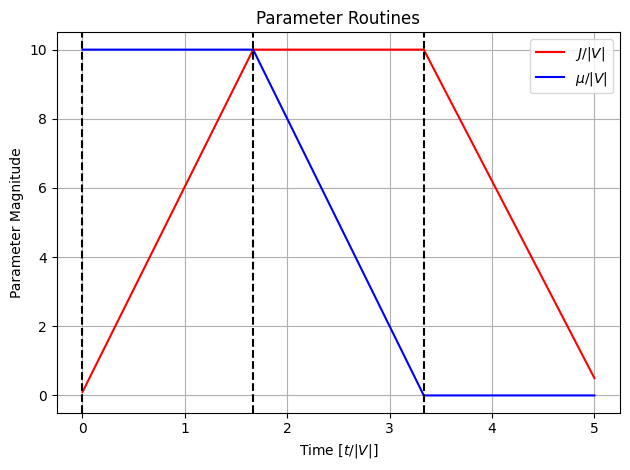

In [10]:
# --------------------------------------------------------------------------------------------------------------------------------------------    
# plot 5: parameter evolution versus time
fig, ax = plt.subplots()
ax.plot(times, J_V_ratio_routine, 'r', label = "$J/|V|$")
ax.plot(times, mu_V_ratio_routine, "b", label = "$\mu/|V|$")
        
ax.set_title("Parameter Routines")
ax.legend(loc = "upper right")
ax.set_ylabel("Parameter Magnitude")
ax.set_xlabel("Time [$t/|V|$]")
ax.grid()
fig.tight_layout()

accumulated_time = 0
for time in time_array:
    ax.axvline(accumulated_time, color = "k", linestyle = "--")
    accumulated_time += time

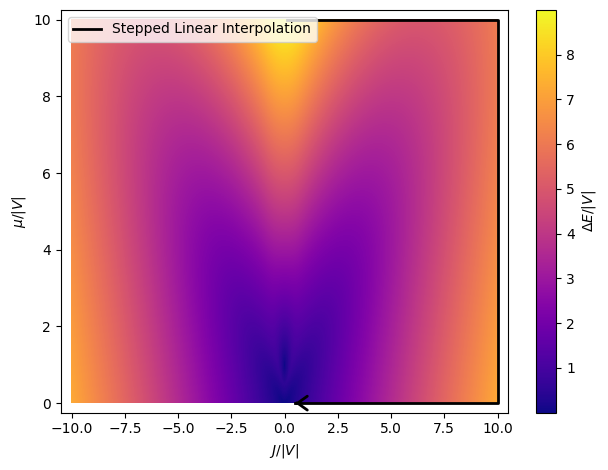

In [11]:
df = pd.read_csv("energy_gap_over_V_neg_V_resolution=1000.csv", index_col='J/V_ratios')
energy_gap_grid = df.to_numpy()

J_V_ratios = np.linspace(-10,10,1000)
mu_V_ratios = np.linspace(0,10,1000)
mu_V_ratio_grid, J_V_ratio_grid = np.meshgrid(mu_V_ratios, J_V_ratios)

plt.pcolormesh(J_V_ratio_grid, mu_V_ratio_grid, energy_gap_grid, shading = "auto", cmap = "plasma")
plt.colorbar(label="$\Delta E/ |V|$")

plt.plot(J_V_ratio_routine, mu_V_ratio_routine, "-k", label = "Stepped Linear Interpolation", lw = 2)

plt.annotate(
    '', 
    xy=(J_V_ratio_routine[-1], mu_V_ratio_routine[-1]),  # end point of the line
    xytext=(J_V_ratio_routine[-2], mu_V_ratio_routine[-2]),  # a point just before the end for direction
    arrowprops=dict(
        arrowstyle='->,head_width=0.5,head_length=0.7',  # adjust size as needed
        color='k', 
        lw = 2
    )
)

plt.xlabel("$J/|V|$")
plt.ylabel("$\mu/|V|$")
plt.legend(loc="upper left")
plt.xlim(-10.5,10.5)
plt.ylim(-0.25,10.25)
plt.tight_layout()
